# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [164]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import linregress
from scipy.stats import pearsonr

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [167]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df[81:150]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013
1602,TENNOVA HEALTHCARE-JEFFERSON MEMORIAL HOSPITAL,440056,TN,READM-30-AMI-HRRP,31,NaN,1.0992,24.2,22.1,13.0,07/01/2010,06/30/2013
2048,FORT MADISON COMMUNITY HOSPITAL,160122,IA,READM-30-AMI-HRRP,33,NaN,1.0847,22.6,20.9,12.0,07/01/2010,06/30/2013
2441,ISLAND HOSPITAL,500007,WA,READM-30-AMI-HRRP,34,NaN,1.0738,20.8,19.3,11.0,07/01/2010,06/30/2013
2512,NORTH CENTRAL BRONX HOSPITAL,330385,NY,READM-30-HF-HRRP,34,NaN,1.0720,23.3,21.8,12.0,07/01/2010,06/30/2013
2825,KAISER FOUNDATION HOSPITAL FONTANA,50140,CA,READM-30-PN-HRRP,34,NaN,1.0651,20.7,19.4,11.0,07/01/2010,06/30/2013


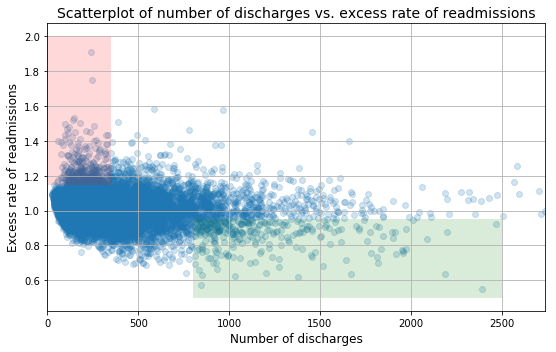

In [10]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [14]:
# Your Turn

I do not agree with the analysis and recommendations presented above. One cannot be certain that the overall trend is decreasing between excess rate of readmissions and number of discharges, until a Pearson correlation test with linear regression is performed. The two fill areas are misleading, and don't paint the whole picture. For example, two values in the red region look like outliers, but they are unfairly highlighted to show that the mean of this area is quite high. 

The difference in means of the excess readmission rates for the two regions doesn't look to be that great, and its statistical significance needs to be tested. Because of these reasons, I cannot also believe the recommendations without due diligence. 

In [54]:
""" The major test needs to check whether there is a significant correlation between the two parameters. The null 
hypothesis is there is no correlation between the variables. """

slope, intercept = np.polyfit(x,y,1)
r_value = np.corrcoef(x,y)[0,1]
info = {'slope': slope, 'intercept':intercept, 'r-value':r_value, 'R^2 value':r_value**2}
info

{'slope': -2.856505294381995e-05,
 'intercept': 1.01794755795442,
 'r-value': -0.09309554287590442,
 'R^2 value': 0.008666780103359358}

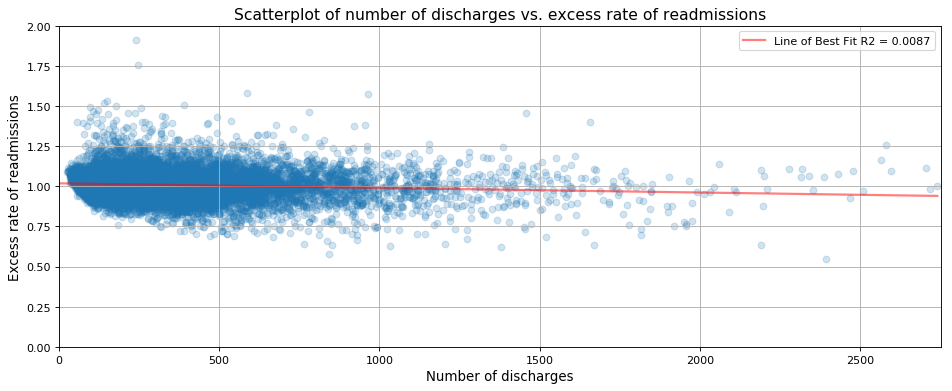

In [103]:
plt.figure(num=1, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='none')
plt.scatter(x, y,alpha=0.2)

plt.xlim([0,2750])
plt.ylim([0,2.0])
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

plt.grid(True)
plt.tight_layout()

xline =np.array([0,x[-1]])
plt.plot(xline, slope * xline + intercept, color='r', alpha=0.5, linewidth=2, label='Line of Best Fit R2 = 0.0087')
plt.legend()

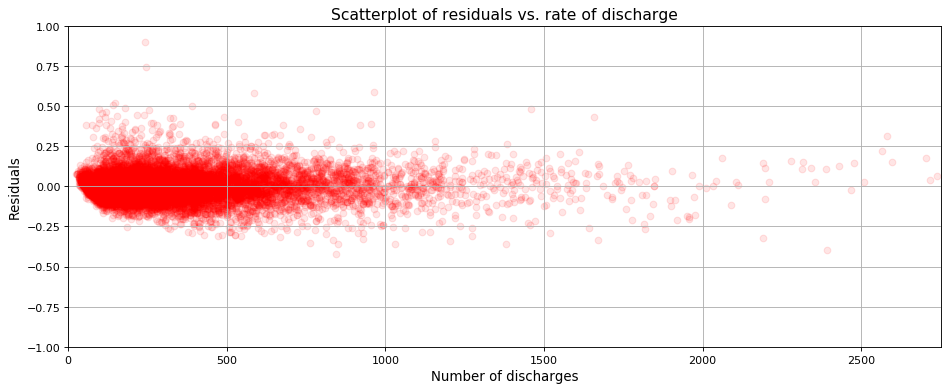

In [104]:
#Residual plot
coefs = np.polyfit(x,y, 1)
yfit = np.polyval(coefs,x)

plt.figure(num=2, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='none')
plt.scatter(x, y-yfit,alpha=0.1, color='r')

plt.xlim([0,2750])
plt.ylim([-1,1.0])
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.title('Scatterplot of residuals vs. rate of discharge', fontsize=14)

plt.grid(True)
plt.tight_layout()

As can be seen from the residuals plot, the data shows a decrease in variance as number of discharges increases. The residuals in the simple linear regression should be normally distributed with a mean of zero and a constant variance. 

The line of best fit yields a R^2 value of 0.0087, and a Pearson correlation coefficient of -0.093. These values hardly suggest that a correlation exists in the data

In [132]:
# Defining a pair bootstrap tests on line of best fit

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [134]:
#Performing bootstraps test on the line of best fit
np.random.seed(1)

x_arr = np.array(x)
y_arr = np.array(y)
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(x_arr,y_arr,100)

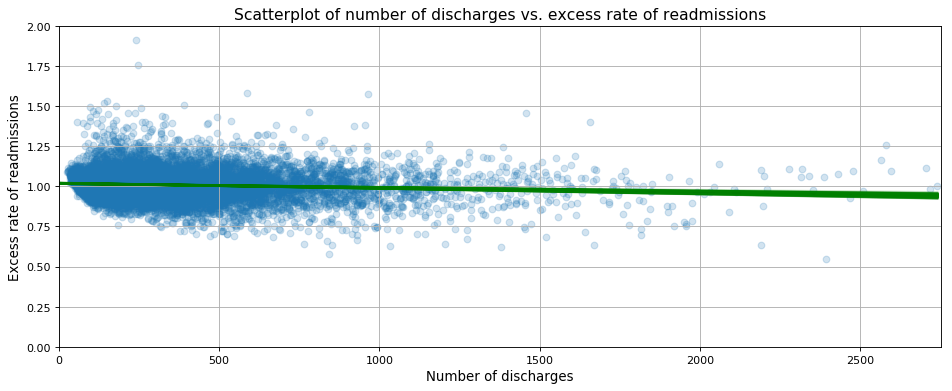

In [138]:
plt.figure(num=3, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='none')
plt.scatter(x, y,alpha=0.2)

plt.xlim([0,2750])
plt.ylim([0,2.0])
plt.xlabel('Number of discharges', fontsize=12)
plt.ylabel('Excess rate of readmissions', fontsize=12)
plt.title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

plt.grid(True)
plt.tight_layout()

xline =np.array([0,x[-1]])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(xline, bs_slope_reps[i]*xline + bs_intercept_reps[i],
             linewidth=2, alpha=0.2, color='g')

In [141]:
#The confidence interval for these slopes and intercepts
CI_slope = np.percentile(bs_slope_reps,[2.5,97.5])
CI_intercept = np.percentile(bs_intercept_reps,[2.5,97.5])
print('The 95% CI for the slopes is ' + str(CI_slope))
print('The 95% CI for the intercepts is ' + str(CI_intercept))

The 95% CI for the slopes is [-3.47367304e-05 -2.21108434e-05]
The 95% CI for the intercepts is [1.01502756 1.02084151]


In [166]:
slope, intercept, r_val, p_val, stdev = linregress(x,y)
r, p_val_relation = pearsonr(x,y)
print('slope: %f' + str(slope), '\nintercept: ' + str(intercept), '\nr-value: ' + str(r_val), '\nSlope p-value: ' + str(p_val) , '\nStd Dev: ' + str(stdev), '\nPearson Relations p_value: ' + str(p_val_relation))

slope: %f-2.8565052943822634e-05 
intercept: 1.017947557954422 
r-value: -0.09309554287590441 
Slope p-value: 1.5022756426615086e-23 
Std Dev: 2.849824827849989e-06 
Pearson Relations p_value: 1.5022756426464526e-23


Since we can see that the p-value is very small here, the null hypothesis can be rejected, i.e. the slope coefficient of the relationship is zero. However the p-value of the Pearson coefficient is also very small here, even at the 0.01 significance level, and so the null hypothesis can be rejected, i.e. there is a correlation between the number of discharges and excess rate of readmissions. 

The statistical significance denotes that there is no correlation between the two parameters. This could be because the sample size is too large, and large variances cause a very low p_value. The picture becomes clear when the practical significance comes into focus. The very low R^2 value of the line of best fit indicates that such a comparison of the two variables may not be meaningful. Other variables need to be analyzed to give better recommendations to the client. Some examples include: analyzing excess readmission ratio with total actual number of readmissions, hospital capacity versus discharges and actual readmissions; readmissions may be also a result of incompetencies and scheduled regular checkups for serious conditions, and a lower capacity of beds in hospitals is not the main cause: these other variables need to be checked as well. Quality of care and good resource allocation must be demonstrated regardless of the size of the hospitals, and I wouldn't recommend any changes given the lack of any conclusive evidence based on the data. 

Since there is no correlation between the variables, an effective plot would be the univariate histogram distribution as follows:

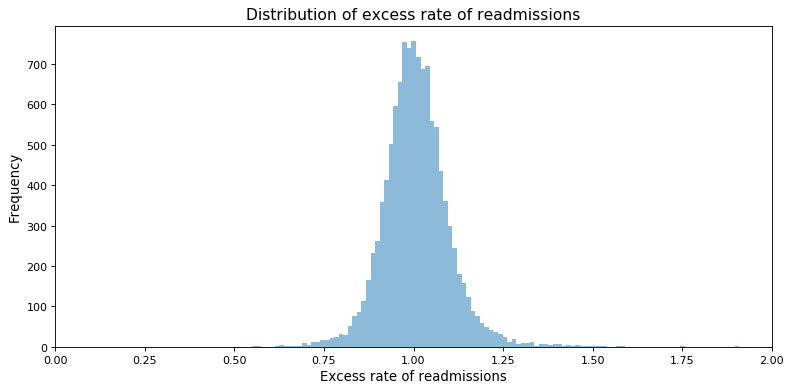

In [172]:
plt.figure(num=4, figsize=(10, 5), dpi=80, facecolor='w', edgecolor='none')
plt.hist(y,alpha=0.5, bins=int(np.sqrt(len(y))))

plt.xlim([0,2])
plt.xlabel('Excess rate of readmissions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of excess rate of readmissions', fontsize=14)

plt.grid(False)
plt.tight_layout()